<a href="https://colab.research.google.com/github/BimsaraS99/Thompson-Sampling-Reinforcement-Learning-ml/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling
Thompson sampling is a probabilistic algorithm.

## Importing the libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [25]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [26]:
dataset.sample(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
3887,1,0,1,0,0,0,1,0,0,0
4730,0,0,0,0,0,0,0,1,0,0
2567,0,0,0,0,1,0,0,1,0,0
9301,0,0,0,1,1,0,0,0,0,0
2509,1,0,0,0,0,0,0,1,0,0


## Implementing Thompson Sampling

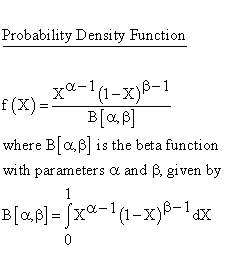

In [27]:
import random
N = 2000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

In [28]:
print(numbers_of_rewards_1)
print(numbers_of_rewards_0)

[9, 0, 4, 8, 419, 0, 1, 45, 2, 0]
[61, 19, 37, 58, 1079, 20, 23, 163, 33, 19]


## Visualising the results - Histogram

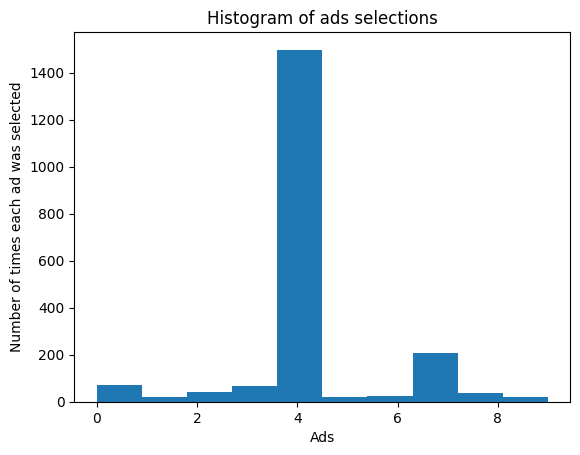

In [29]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### **Advertisement 5 will be chosen to run the ad campaign.**

In [32]:
from scipy.stats import beta

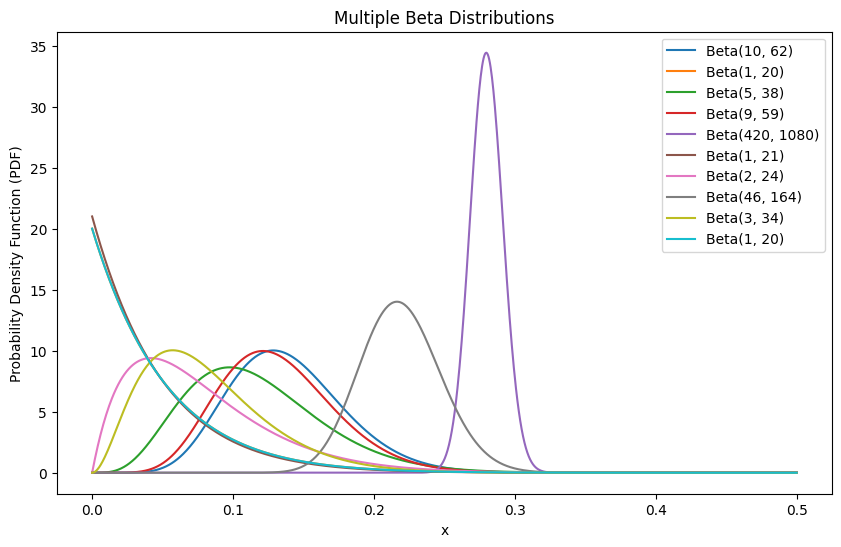

In [35]:
plt.figure(figsize=(10, 6))

for i in range(d):
    alpha = numbers_of_rewards_1[i] + 1
    beta_param = numbers_of_rewards_0[i] + 1
    x = np.linspace(0, 0.5, 1000)

    y = beta.pdf(x, alpha, beta_param)

    # Plot the Beta distribution
    plt.plot(x, y, label=f'Beta({alpha}, {beta_param})')

plt.title('Multiple Beta Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()

plt.show()


As you can see on the above figure, advertisement 5 has the highest PDF value and lowest probability range.

Beta distribution : https://www.youtube.com/watch?v=juF3r12nM5A

Thompson sampling : https://www.youtube.com/watch?v=nkyDGGQ5h60

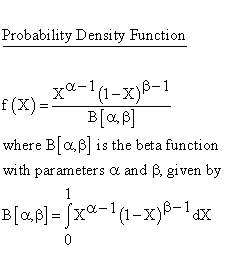

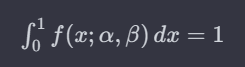

The integral of the PDF function is always 1, ensuring that the area under the curve remains constant. Consequently, when the range of the curve decreases, its height increases to maintain the total area at 1. This is why, for example, in a Beta distribution, the peak or highest point on the curve, such as at number 5, corresponds to the highest PDF value.

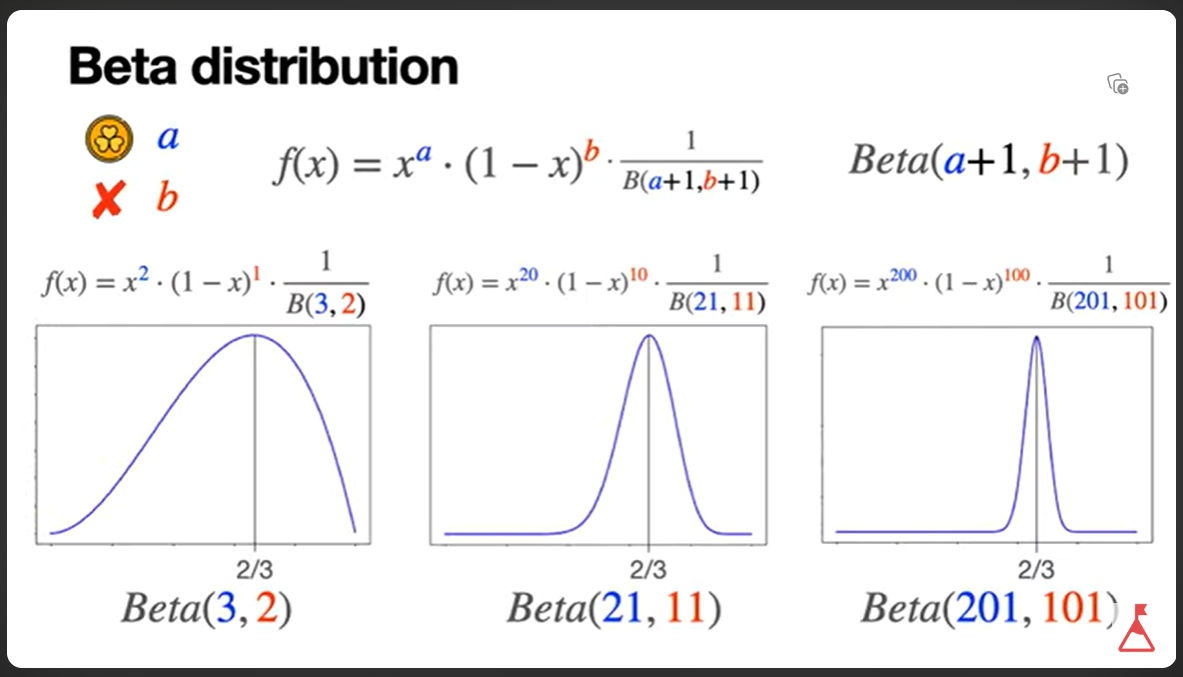

# **RANDOM SELECTION**

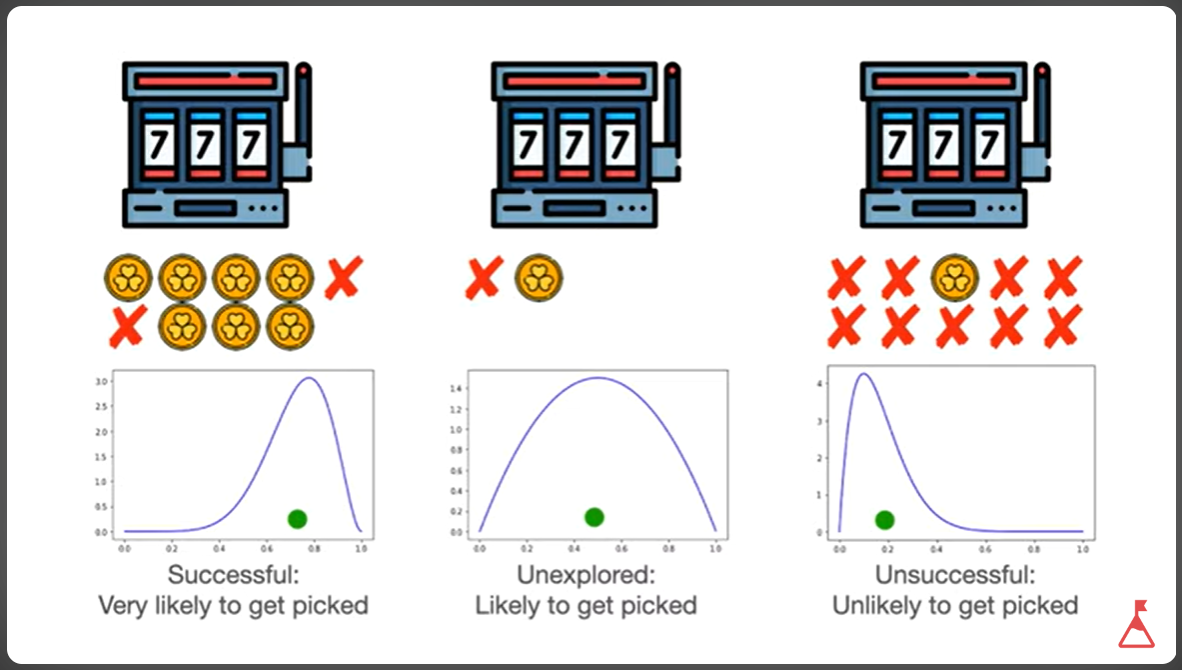